# Ways A Wing Works

["The Sibley Guide to Bird Life & Behavior"](https://bookshop.org/books/7836798/9781400043866) is a beautiful book, filled with elegant illustrations and clear explanations of bird physiology and behavior.  It's a wonderful composition of art and science.

That's why I found this passage so jarring:

> Physical laws ordain that the air flowing over the top of the wing must reach the back of the wing (the trailing edge) at the same time as air flowing under the wing.  The curvature of the wing forces air to travel farther across the top surface than across the bottom.  In order to travel the longer distance in the same amount of time, the air passing over the top of the wing must flow faster than the air flowing underneath the wing.  This faster-moving air results in lower air pressure above the wing than below.  The net result is lift...

The explanation looked familiar.  I'd been reading similar descriptions since my youth.  Still, when I read this I suddenly realized it didn't actually explain anything.  It contained factual errors.  It glossed over Bernoulli's principle.  More than anything, it read as an appeal to authority.

I hope Mr. Sibley will consider replacing this passage in a future edition.  A simple explanation based on how the distribution of pressure on a wing changes with the relative motion of air and wing would be much more effective.

Granted he is describing bird wings and not airplane wings; but maybe Mr. Sibley could just direct his readers to Chapter 1 of Wolfgang Langeweische's ["Stick and Rudder,"](https://en.wikipedia.org/wiki/Stick_and_Rudder) and be done with it.

Anyway, as I say I found this passage jarring.  In this post I'll explain more about what bugs me.  Then I'll try to build a model that explains lift in terms of the distribution of air pressure on a wing, and that shows how the distribution of that pressure varies depending on the motion of the wing relative to the air.

# What Bugs Me

Stick your arm out the window of a moving car, like a bird spreading its wing.  Make your hand into a flat shape.  Rotate your hand.  Depending on how you orient your arm to the passing air, you may feel your arm being pushed up, or down, or merely straight back.

At heart, lift and drag seem to be just this simple: they're caused by collisions between a flat surface and a fluid relative to which it is moving.

**Speed matters.**  Suppose it's a calm day.  The car slows to a stop.  Your arm doesn't feel any upward or downward force (OK, except gravity). To feel any lift force your arm needs to be moving relative to the mass of air around it.

**Angle matters.**  If you angle your hand so that the leading edge – the side that faces into the wind – is higher than the trailing edge, you feel lift.  If you angle it so that the leading edge is lower, you feel a downward force.  If you orient your hand so that the leading and trailing edges are nearly level with one another, you don't feel much upward or downward force at all.

**Shape matters.** (I haven't tried this.  Let me know if it's wrong.)  Shape your hand into a fist.  Make it look as much like a ball as you can.  You'll probably find that, no matter how you rotate your fist, you don't feel much change in lift.

It seems you get a much stronger lift effect when your hand is shaped like a flat surface than when it is balled up.

**Shape doesn't matter.**

> The curvature of the wing forces air to travel farther across the top surface than across the bottom.

Does "the curvature of the wing" refer here to the shape of the wing's top surface, or to the curvature of the wing as a whole?  Either way, this is a dubious claim.

The "wings" of a box kite are flat, made up of paper or thin fabric stretched across a frame.  They have the same shape, top and bottom.  They generate lift.

> "The airfoil on the Lockheed F-104 straight-wing supersonic fighter is a thin, symmetric airfoil with a thickness ratio of 3.5 percent."
> -- Introduction to Flight, 7th Edition

The top surface of an F-104 wing is shaped exactly like its bottom surface.  It generates lift.

**Air isn't obliged to travel.** 

> Physical laws ordain that the air flowing over the top of the wing must reach the back of the wing (the trailing edge) at the same time as air flowing under the wing.

And, again:

> The curvature of the wing forces air to travel farther across the top surface than across the bottom.

Imagine you're an air molecule, bouncing around a meter or so above a runway on a calm day.  *You aren't traveling anywhere.*  Still, when you collide with an oncoming wing, on an airplane that has rotated for takeoff, you contribute to the lift on that wing.

Still not convinced?  Have a look at [this experimental footage](https://youtu.be/-GIToNj-m4M?t=321) from the University of Iowa, which shows fluid flowing "over" the top of an airfoil.  It doesn't reach the trailing edge at the same time as the fluid flowing "under" the airfoil.  It gets there *first*.


**OK, shape does matter.** The hand-out-car-window experiment shows that the shape of an airfoil does matter.  It seems that some variation of an inclined plane, moving through air, is useful for generating lift.

The best shape seems to vary depending on the task at hand.  The cross-section of an F-104 wing looks something like a knife.  That of a B-24 [looks like a classic NACA airfoil](http://www.designfoil.com/primer/airfoil5.html).  The wings of [early Wright Flyers](https://insider.altairhyperworks.com/nothing-between-you-and-your-design/) and of many WWI aircraft had much the same shape on top and bottom, like curved sheets of paper.  The "wings" of a box kite are flat.

There are [all kinds of wing shapes](https://commons.wikimedia.org/wiki/File:Examples_of_Airfoils.svg), suited for different purposes.

Almost all of these wings can *change* shape, e.g., by deploying flaps, depending on the phase of flight.

Bird wings are probably the most variable of all.  A soaring gull's wing may be similar in cross section to that of an airplane wing, but birds can change the curvature of their wings an awful lot as they beat them for takeoff, extend them for gliding, or flare and beat them for landing.  (Wings aside, it seems as though almost [every part of a bird can contribute to lift](https://jeb.biologists.org/content/223/3/jeb214809).)

## Speed, Attitude and Shape

The speed with which an airfoil moves through a fluid, the angle at which it is oriented with respect to the relative motion of the fluid, and the shape of the airfoil, all affect the distribution of forces on each patch of the airfoil surface.

This distribution of forces adds up to the net lift, and drag, on an airfoil.  I think I can show this using two main concepts: static pressure and relative wind velocity.

# A Model of Lift

Let's define some basic abstractions to help represent a wing, forces, etc.

## Two-Dimensional Vector

(I remember young aeronautical engineers at Wright-Patterson AFB joking about wings with infinite spans.  So it is with this model: there are only two spatial dimensions.)

This model uses vectors to represent things like wind velocity and normal forces.

In [2]:
import math
import typing as tp

class Vector:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y
        
    def mag(self) -> float:
        return math.sqrt(self.x * self.x + self.y * self.y)
    
    def scaled(self, s: float) -> "Vector":
        return Vector(self.x * s, self.y * s)
    
    def __add__(self, other: "Vector") -> "Vector":
        return Vector(self.x + other.x, self.y + other.y)
    
    def __radd__(self, other: "Vector") -> "Vector":
        return self.__add__(other)

    def __sub__(self, other: "Vector") -> "Vector":
        return Vector(self.x - other.x, self.y - other.y)
    
    def __rsub__(self, other: "Vector") -> "Vector":
        return self.__sub__(other)
    
    def __mul__(self, mag: float) -> "Vector":
        return self.scaled(mag)
    
    def __rmul__(self, mag: float) -> "Vector":
        return self.scaled(mag)
    
    def unit(self) -> "Vector":
        m = self.mag()
        if m <= 0.0:
            return Vector(0.0, 0.0)
        return self.scaled(1.0 / m)
    
    def direction(self) -> float:
        return math.atan2(self.y, self.x)
        
    def dot(self, other: "Vector") -> float:
        return self.x * other.x + self.y * other.y
    
    def projected(self, other: "Vector") -> "Vector":
        return other.unit().scaled(self.dot(other))
    
    def mean(self, other: "Vector") -> "Vector":
        mid = 0.5
        return Vector(mid * (self.x + other.x), mid * (self.y + other.y))
    
    def __str__(self) -> str:
        return f"{self.__class__.__name__}({self.x}, {self.y})"
    
    __repr__ = __str__
    

## Two-Dimensional Point

For convenience let's just say a Point is the same thing as a Vector.  A Vector represents a magnitude and a direction.  A Point is a location in space, offset from the coordinate origin by a distance in a direction.  Same thing ;)

In [3]:
Point = Vector

## Ray

A Ray is a Vector with a termination point.  It will be handy when drawing a vector, since it can tell where to put the arrowhead.

In [4]:
class Ray:
    def __init__(self, x: float, y: float, dx: float, dy: float) -> None:
        self.x, self.y = x, y
        self.v = Vector(dx, dy)
        
    def vec(self) -> Vector:
        return self.v
        
    def direction(self) -> float:
        return self.v.direction()
    
    def projected(self, other: "Ray") -> "Ray":
        pv = self.v.projected(other.v)
        return Ray(self.x, self.y, pv.x, pv.y)
        
    def draw(self, style="k-", linewidth=0.75) -> None:
        """Poor separation of concerns: draw self on the current plt."""
        x, y = self.x, self.y
        dx, dy = self.v.x, self.v.y
        x0 = x + dx
        y0 = y + dy
        plt.plot([x, x0], [y, y0], style, linewidth=linewidth)
        angle = math.atan2(dy, dx)
        a1 = angle + math.pi / 8.0
        a2 = angle - math.pi / 8.0
        head_len = 0.25
        for a in [a1, a2]:
            adx = head_len * math.cos(a)
            ady = head_len * math.sin(a)
            plt.plot([x, x + adx], [y, y + ady], style, linewidth=linewidth)
            
    def __str__(self) -> str:
        return f"{self.__class__.__name__}({self.x}, {self.y}, {self.v})"
    
    __repr__ = __str__

## Airfoil

For our purposes it's probably sufficient to represent an airfoil as a sequence of points - the vertices of a polygon.

To help with drawing, finding normals, etc., let's order the points clockwise around the the airfoil.

In [177]:
points = [10.0 * Point(x, y) for (x, y) in [
    [0.0, 0.0],
    [0.02, 0.03],
    [0.04275, 0.05],
    [0.1, 0.07],
    [0.175, 0.087],
    [0.25, 0.09],
    [0.425, 0.07],
    [1.0, -0.07],
    [0.5, -0.055],
    [0.125, -0.035],
    [0.04275, -0.03],
    [0.02, -0.02],
    [0.0, 0.0]
]]

## Drawing Functions

Let's use matplotlib for drawing, for no particular reason.

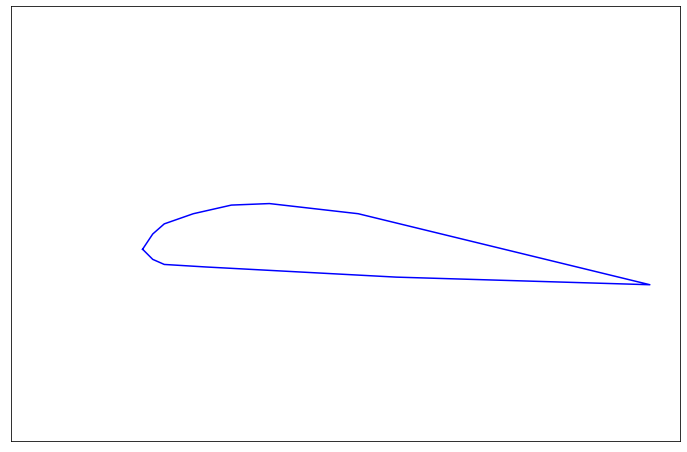

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt

def init_plot():
    fig = plt.figure(figsize=(12, 8))
    plt.xlim((-2, 10))
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    return fig

def draw_foil(fig, points: tp.Iterable[Point]):
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.plot(x, y, 'b-', scalex=False, scaley=False)

fig = init_plot()
draw_foil(fig, points)
plt.show()

*Mr. Sibley is a masterful artist.  I am not.*

## Pressure

"Pressure" – or should I write "static pressure?" – is a force acting uniformly on the surface of an object.  It presses directly inward on every point on the object's surface.  In other words, pressure is a uniform, normal force over the whole surface area of the object.

Air pressure on the surface of an airfoil can be thought of as the net result of the molecules in the air colliding with the surface over some small time period.  No matter the angle or impact speed of any individual collision with a given surface patch of the airfoil, the net effect of all of the collisions can be represented by a force acting normal to the patch.

*I guess that's not strictly true at smaller scales, [with smaller numbers of particles](https://www.youtube.com/watch?v=GOJFznzSZhM&feature=youtu.be&t=479).  Let's move on.*

## Force Over Area

With that sloppy definition in mind, let's break the airfoil into line segments and find the unit normal vector for each segment.

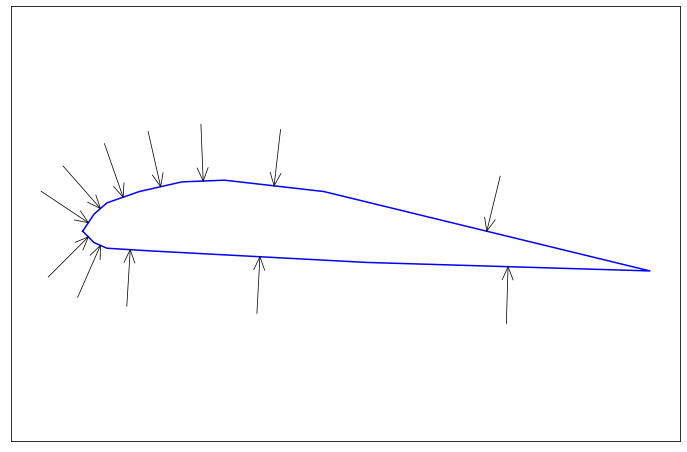

In [179]:
class Segment:
    def __init__(self, p0: Point, pf: Point) -> None:
        self.p0 = p0
        self.pf = pf
        
    def length(self) -> float:
        return (self.pf - self.p0).mag()
        
    def normal(self) -> Ray:
        # Get a Ray, terminated at self's mid-point, normal to self,
        # having unit length.
        # Lie, cheat, steal:  The points are from the geometry of an airfoil
        # and are ordered so that the returned normal ray points from the
        # outside of the airfoil to the inside.
        rpoint = self.pf - self.p0
        ray = Ray(self.pf.x, self.pf.y, rpoint.x, rpoint.y)
        mid = self.p0.mean(self.pf)
        angle = ray.direction()
        normal = angle + math.pi / 2.0
        unit_x = math.cos(normal)
        unit_y = math.sin(normal)
        return Ray(mid.x, mid.y, unit_x, unit_y)
        
segments = [Segment(points[i - 1], points[i]) for i in range(1, len(points))]
normals = [seg.normal() for seg in segments]

def draw_rays(fig, rays: tp.Iterable[Ray], style="k-"):
    for ray in rays:
        ray.draw(style=style)

fig = init_plot()
draw_foil(fig, points)
draw_rays(fig, normals)
plt.show()

Each of these normal vectors represents the pressure on a patch of the airfoil.

You could think of each vector as the path that a representative molecule traverses, during some time interval $\Delta{t}$, in order to hit its unit of airfoil with the "pressure" force.

Let's sum all of the fractional pressures to get a net force on the airfoil.  Since each normal represents force per unit of area – or, in this 2D case, per unit of length – let's multiply each normal by the length of the segment that it hits, to get the total force on the segment.

Vector(-2.7478019859472624e-15, 3.0531133177191805e-16) 2.7647116962323688e-15


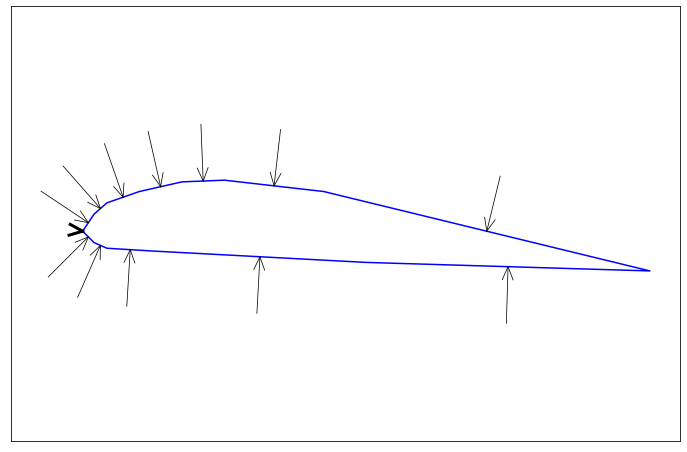

In [180]:
def sum_forces(
    segments: tp.Iterable[Segment],
    seg_pressures: tp.Iterable[Vector]
) -> Vector:
    result = Vector(0.0, 0.0)
    for segment, pressure in zip(segments, seg_pressures):
        result += segment.length() * pressure
    return result

normal_vecs = [n.vec() for n in normals]
total_force = sum_forces(segments, normal_vecs)
print(total_force, total_force.mag())

def plot_force_vec(fig, fv):
    # Oops!  I should have computed the origin of the total
    # force vector...
    anchored = Ray(0.0, 0.0, fv.x, fv.y)
    anchored.draw(style="k-", linewidth=3)
    
fig = init_plot()
draw_foil(fig, points)
draw_rays(fig, normals)
plot_force_vec(fig, total_force)
plt.show()


*I didn't actually expect the net force to sum to zero.  It's easy to imagine a shape with a bottom surface so crinkly that it is significantly "longer" than the top surface; and to guess that the net effect would be an upward force.  Then again, maybe testing would show the crinkles have such small individual extent that their summed horizontal extent is no greater than that of an upper surface?  I digress...*

## Wind

Let's add a little wind.  Adding the same wind vector to each representative normal vector gives a new path that each representative molecule travels before colliding with the airfoil.

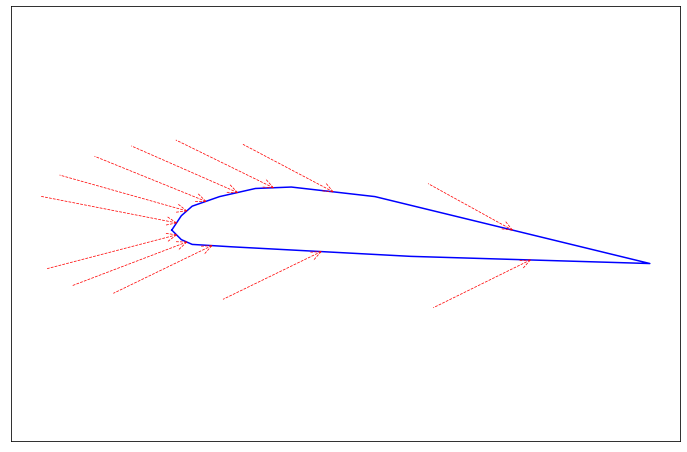

In [181]:
def with_wind(normals: tp.Iterable[Ray]) -> tp.List[Ray]:
    wind = Vector(-2.0, 0.0)
    result = []
    for n in normals:
        winded = n.vec() + wind
        result.append(Ray(n.x, n.y, winded.x, winded.y))
    return result

wind_vectors = with_wind(normals)

fig = init_plot()
draw_foil(fig, points)
draw_rays(fig, wind_vectors, style='r--')
plt.show()


What component of each of these "windy" vectors is normal to the airfoil segment that it hits?  In other words, how does the wind change the pressure on each part of the airfoil?

In [182]:
windy_normals = [wv.projected(n) for (wv, n) in zip(wind_vectors, normals)]

And what is the net force now?

Net force vector: Vector(-2.08030694104542, -2.98058650753191)
Net force: 3.6347727436310264


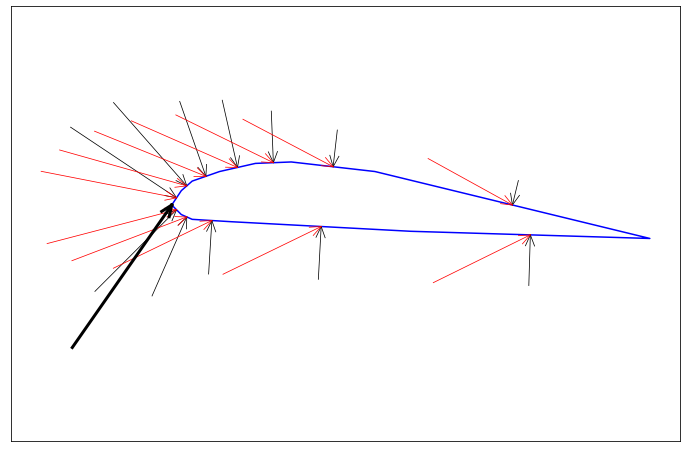

In [183]:

wn_vecs = [wn.vec() for wn in windy_normals]
total_windy_force = sum_forces(segments, wn_vecs)
print("Net force vector:", total_windy_force)
print("Net force:", total_windy_force.mag())

fig = init_plot()
draw_foil(fig, points)
draw_rays(fig, windy_normals)
draw_rays(fig, wind_vectors, style="r-")
plot_force_vec(fig, total_windy_force)
plt.show()



How about that.  By adding a bit of wind we can change the pressure over different parts of the airfoil.  The top of the airfoil feels less pressure overall than the bottom.

In other words **we have lift** *(and also drag)*.

But are we guaranteed to get lift just by adding wind?  Of course not.  As the hand-out-car-window experiment showed, the lift force on an airfoil in a flowing fluid varies depending on the angle of attack - the angle of the fluid flow with respect to, say, the chord line of the airfoil.

Let's try to find the zero-lift angle.

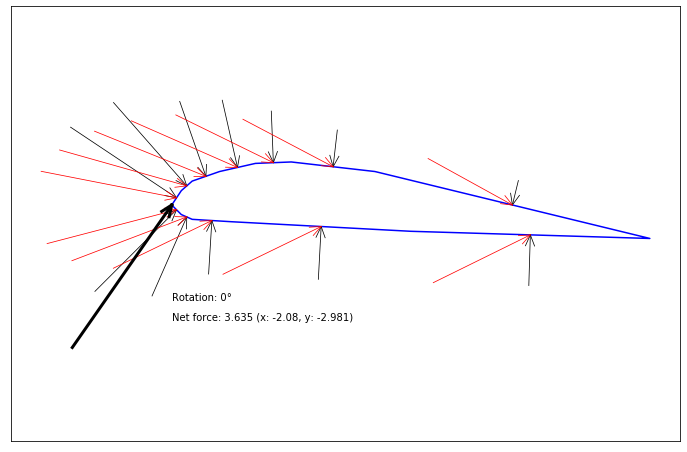

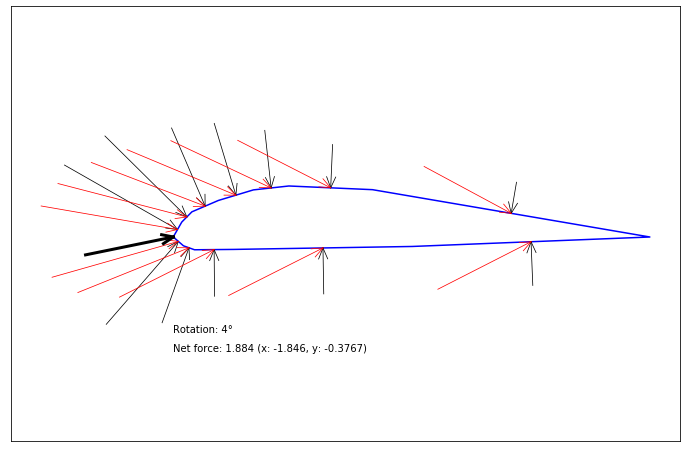

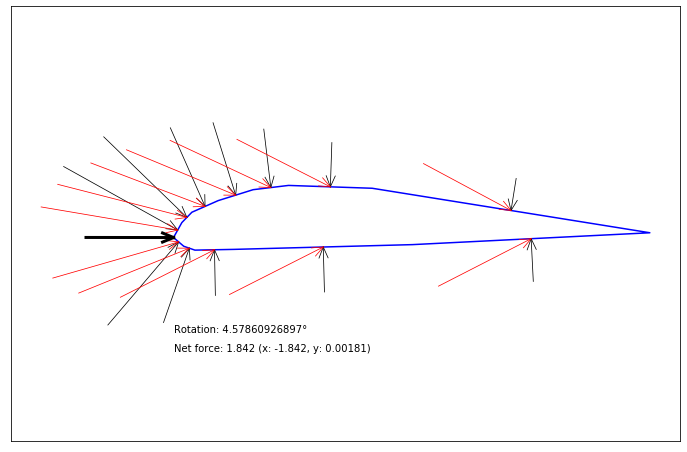

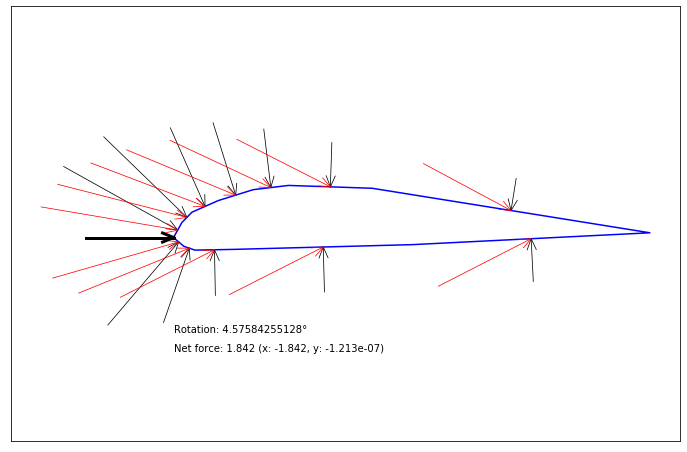

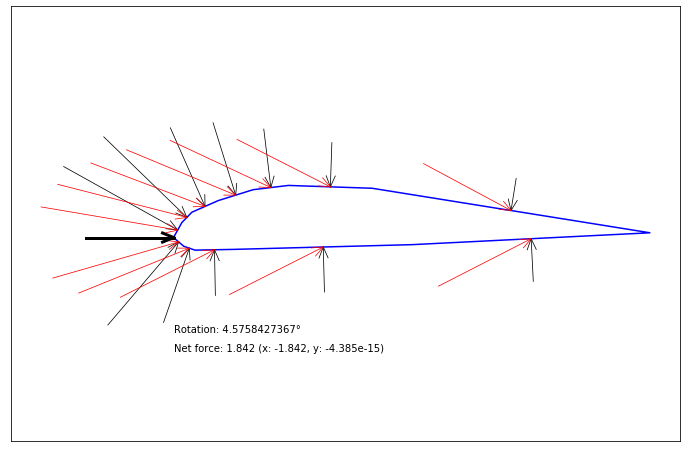

In [188]:
def rotate(p: Point, angle: float) -> Point:
    cos = math.cos(angle)
    sin = math.sin(angle)
    x = p.x * cos - p.y * sin
    y = p.x * sin + p.y * cos
    return Point(x, y)

angle = 4.4908 * math.pi / 180.0
down_points = [rotate(p, angle) for p in points]

# Calculate normals + wind acting on an airfoil.  Display the result.
# Return the net lifting force.
def calc_and_show(foil: tp.Iterable[Point], deg: float) -> float:
    segments = [Segment(foil[i - 1], foil[i]) for i in range(1, len(foil))]
    normals = [seg.normal() for seg in segments]
    wind_vectors = with_wind(normals)
    windy_normals = [wv.projected(n) for (wv, n) in zip(wind_vectors, normals)]
    wn_vecs = [wn.vec() for wn in windy_normals]
    total_force = sum_forces(segments, wn_vecs)

    fig = init_plot()
    draw_foil(fig, foil)
    draw_rays(fig, windy_normals)
    draw_rays(fig, wind_vectors, style="r-")
    plot_force_vec(fig, total_force)
    plt.text(0.0, -2.0, f"Rotation: {deg:.12g}°")
    
    fmag = total_force.mag()
    fx = total_force.x
    fy = total_force.y
    plt.text(0.0, -2.4,
             f"Net force: {fmag:.4g} (x: {fx:.4g}, y: {fy:.4g})")
    return total_force.y

def calc_for_angle(deg: float) -> float:
    angle = deg * math.pi / 180.0
    prot = [rotate(p, angle) for p in points]
    return calc_and_show(prot, deg)

def find_zero_lift() -> None:
    angle_prev = 0.0
    fy_prev = calc_for_angle(angle_prev)

    d_angle = 4.0
    threshold = 1.0e-09
    for i in range(10):
        angle = angle_prev + d_angle
        fy = calc_for_angle(angle)
        if abs(fy) < threshold:
            break
        # Slope: df(x)/dx
        s = (fy - fy_prev) / d_angle
        # Guess: fy + s * d_angle_new = 0
        # d_angle_new = -fy / s
        if abs(s) < 1.0e-6:
            break

        d_angle = -fy / s
        angle_prev = angle
        fy_prev = fy
        
    plt.show()
    
find_zero_lift()

Rotating the airfoil about 4.6 degrees clockwise from its initial orientation results in a net force vector with almost no y component.

# Summary

I found Mr. Sibley's explanation of how a wing makes lift unsatisfying.  It combined strange assertions about how air must flow around a wing with vague references to Bernoulli's principle, but didn't seem to actually explain anything.

A more convincing explanation can be made by thinking about the static (no-wind) pressure of air on an airfoil, and about how relative motion of air and airfoil affect the distribution of that pressure.